# real world data cleaning using the norfolk parking violation:


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("parking_citations.csv")
print("first five rows of data:")
df.head()

first five rows of data:


,Data.Number Plate,Data.State,Data.Car.Make,Data.Car.Style,Data.Car.Color,Data.Location,Data.Violation,Data.Fine,Date.Year,Date.Month,Date.Day,Date.Time.Hour,Date.Time.Minute
0,UZD5497,VA,Suzuki,Sports Utility Veh,Blue,E VIRGINIA BEACH BOULEVARD,HANDICAPPED PARKING,440.0,2020,8,3,7,8
1,UKM3609,VA,Infiniti,Four Door,Gray,E VIRGINIA BEACH BOULEVARD,HANDICAPPED PARKING,440.0,2020,8,12,7,8
2,UHE8253,VA,Kia,Four Door,Gray,W LITTLE CREEK ROAD,HANDICAPPED PARKING,440.0,2020,11,9,14,11
3,UMK5078,VA,Toyota,Sports Utility Veh,Gray,NORVIEW AVENUE,HANDICAPPED PARKING,440.0,2020,11,26,17,11
4,UKF7574,VA,Nissan,Four Door,Blue,COACH WAY DRIVE,HANDICAPPED PARKING,440.0,2020,12,1,2,12


In [36]:
# perform some basic attributes operations
print("shape of data",df.shape)

shape of data (95433, 13)


In [40]:
#check coulumn data types and missing values
print("\n data info",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95433 entries, 0 to 95432
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Data.Number Plate  95433 non-null  object 
 1   Data.State         95433 non-null  object 
 2   Data.Car.Make      95433 non-null  object 
 3   Data.Car.Style     95433 non-null  object 
 4   Data.Car.Color     95433 non-null  object 
 5   Data.Location      95433 non-null  object 
 6   Data.Violation     95433 non-null  object 
 7   Data.Fine          95433 non-null  float64
 8   Date.Year          95433 non-null  int64  
 9   Date.Month         95433 non-null  int64  
 10  Date.Day           95433 non-null  int64  
 11  Date.Time.Hour     95433 non-null  int64  
 12  Date.Time.Minute   95433 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 9.5+ MB

 data info None


In [42]:
#check stastical analysis 
print("\n numeric summary",df.describe())


 numeric summary           Data.Fine     Date.Year    Date.Month      Date.Day  Date.Time.Hour  \
count  95433.000000  95433.000000  95433.000000  95433.000000    95433.000000   
mean      27.167854   2019.583278      6.573376     14.249285       11.445988   
std       56.916866      0.957871      3.406224      8.889415        3.123650   
min     -155.000000   2018.000000      1.000000      1.000000        0.000000   
25%        0.000000   2019.000000      3.000000      6.000000       10.000000   
50%        0.000000   2019.000000      7.000000     13.000000       11.000000   
75%        0.000000   2020.000000     10.000000     22.000000       13.000000   
max      440.000000   2022.000000     12.000000     31.000000       23.000000   

       Date.Time.Minute  
count      95433.000000  
mean           6.573376  
std            3.406224  
min            1.000000  
25%            3.000000  
50%            7.000000  
75%           10.000000  
max           12.000000  


In [54]:
# check missing values
print("\n missing values:")
df.isnull().sum().sum()


 missing values:


0

In [56]:
#check for duplicates 
print("duplicates values:")
print("number of duplicates:",df.duplicated().sum())

duplicates value
number of duplicates: 106


In [72]:
#check the value count
df.value_counts()

Data.Number Plate  Data.State  Data.Car.Make  Data.Car.Style      Data.Car.Color  Data.Location       Data.Violation                 Data.Fine  Date.Year  Date.Month  Date.Day  Date.Time.Hour  Date.Time.Minute
KFT3510            VA          Chevrolet      Four Door           Blue            W 40TH STREET       NO PARKING C                   0.0        2019       10          9         10              10                  2
VKD6550            VA          Ford                                               COLLEY AVENUE       OVERTIME PARKING-TIME ZONE     0.0        2021       7           26        11              7                   2
UYC6875            VA          Nissan         Four Door           Black           GRANBY STREET       METER EXPIRED C                95.0       2019       8           19        16              8                   2
731593             VA          Honda          Four Door           Gray            SHIRLEY AVENUE      STREET CLEANING C              0.0        2

In [76]:
# Fixed the column names
df.columns = (df.columns
              .str.lower()
              .str.replace('[^a-z0-9]', '_', regex=True)
              .str.strip('_'))
print("\nCleaned columns:", df.columns.tolist())


Cleaned columns: ['data_number_plate', 'data_state', 'data_car_make', 'data_car_style', 'data_car_color', 'data_location', 'data_violation', 'data_fine', 'date_year', 'date_month', 'date_day', 'date_time_hour', 'date_time_minute']


In [78]:
# handle missing data
print("\n Missing Values Before ")
print(df.isnull().sum().sort_values(ascending=False))

# Custom filling based on column meaning
df['plate_number'] = df['plate_number'].fillna('UNKNOWN')
df['fine_amount'] = df['fine_amount'].fillna(df['fine_amount'].median())

df = df.dropna(thresh=len(df)*0.3, axis=1).dropna()


=== Missing Values Before ===
data_number_plate    0
data_state           0
data_car_make        0
data_car_style       0
data_car_color       0
data_location        0
data_violation       0
data_fine            0
date_year            0
date_month           0
date_day             0
date_time_hour       0
date_time_minute     0
dtype: int64


KeyError: 'plate_number'

In [80]:
# remove duplicates 
print(f"\nDuplicates before: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Duplicates after: {df.duplicated().sum()}")


Duplicates before: 106
Duplicates after: 0


In [100]:
# column engineering 
df['Violation_Hour'] = pd.to_datetime(df['Issue_Time']).dt.hour
df['Is_Weekend'] = df['Issue_Date'].dt.dayofweek >= 5  # 5=Sat, 6=Sun
df['Severity'] = pd.cut(df['Fine_Amount'],
                       bins=[0, 50, 100, 200, float('inf')],
                       labels=['Low', 'Medium', 'High', 'Extreme'])
df['Year'] = df['Issue_Date'].dt.year
df['Month'] = df['Issue_Date'].dt.month_name()

KeyError: 'Issue_Time'

In [86]:
# report
df.to_csv('cleaned_parking_citations.csv', index=False)

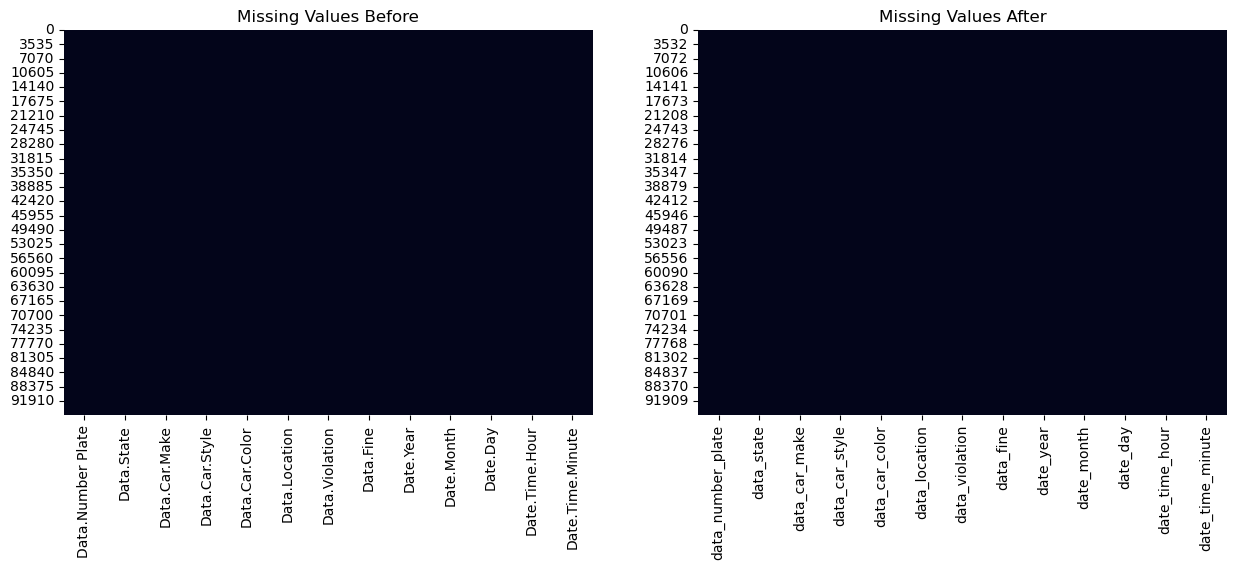

In [111]:
# visualization of data
plt.figure(figsize=(15,5))

# Before cleaning
plt.subplot(1,2,1)
sns.heatmap(pd.read_csv('parking_citations.csv').isnull(), cbar=False)
plt.title("Missing Values Before")

# After cleaning
plt.subplot(1,2,2)
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values After")

plt.show()

In [113]:
# wierd data formats
df['Issue_Date'] = pd.to_datetime(df['Issue_Date'], format='mixed')

KeyError: 'Issue_Date'

In [125]:
df.value_counts(dropna=False)


data_number_plate  data_state  data_car_make  data_car_style      data_car_color  data_location      data_violation                data_fine  date_year  date_month  date_day  date_time_hour  date_time_minute
   BE30895         IL          Chevrolet      Four Door           Silver          BOISSEVAIN AVENUE  OVERTIME PARKING-TIME ZONE    0.0        2020       12          4         12              12                  1
VCA7869            VA          Ford           Four Door           Black           EDUCATION LOT      METER EXPIRED C               0.0        2019       10          15        10              10                  1
VCB1766            VA          Lexus                              Silver          BOISSEVAIN AVENUE  STREET CLEANING C             0.0        2018       10          3         9               10                  1
                                                                                                                                                         

In [129]:
df.value_counts(sort=False)



data_number_plate  data_state  data_car_make   data_car_style      data_car_color  data_location      data_violation                data_fine  date_year  date_month  date_day  date_time_hour  date_time_minute
   BE30895         IL          Chevrolet       Four Door           Silver          BOISSEVAIN AVENUE  OVERTIME PARKING-TIME ZONE    0.0        2020       12          4         12              12                  1
  3EC9177          MD          Nissan          Four Door           Silver          W 42ND STREET      BLOCKING DRIVEWAY/SIDEWALK    140.0      2021       2           19        9               2                   1
  UNB9546          VA          Ford            Four Door           Red             GRANBY STREET      METER EXPIRED C               25.0       2020       7           28        15              7                   1
 296XQP            CO          Jeep            Sports Utility Veh  White           BOUSH STREET       OVERTIME PARKING-TIME ZONE    0.0        2020  